In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

In [27]:
X = digits.data
y = digits.target

In [28]:
print(X.shape,y.shape)

(1797, 64) (1797,)


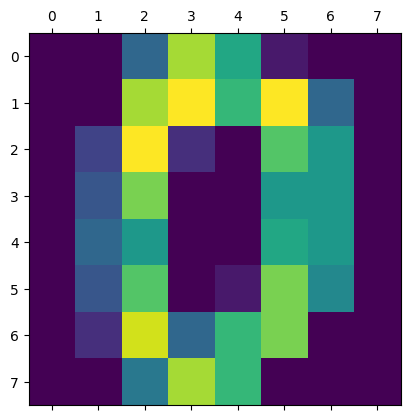

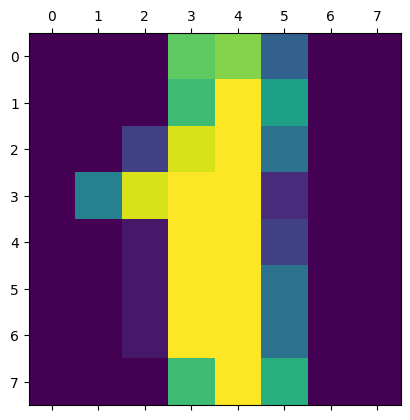

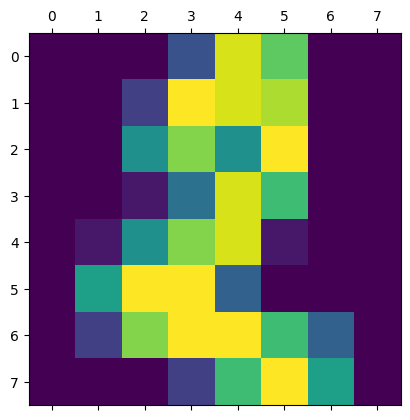

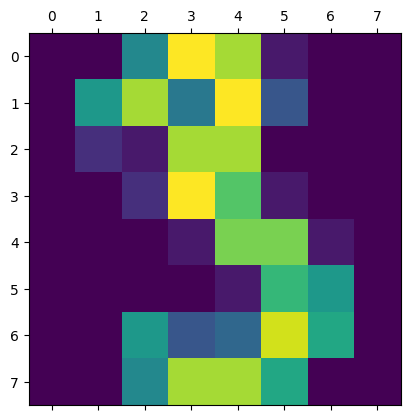

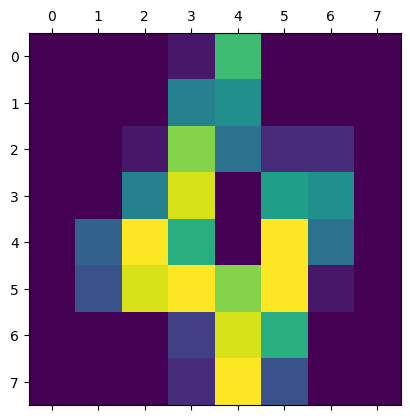

In [10]:
for i in range(5):
    plt.matshow(digits.images[i])

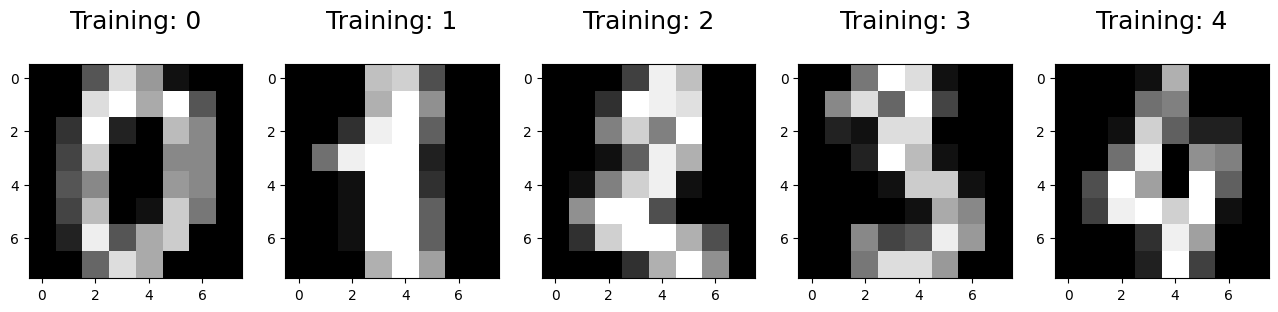

In [13]:
plt.figure(figsize=(16,9))
for index, (image, label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 18)